# Netflix Dataset Analysis with Python

## Project Introduction
This project was completed by Isaboyeva Gulshoda as part of a Data Analytics assignment.  
The purpose of this project is to analyze the Netflix dataset collected from Flixable using Python and pandas.

The dataset contains information about Movies and TV Shows available on Netflix, including attributes such as title, director, cast, country, release year, rating, and duration.

## Project Goals
The main objectives of this project are:
- To practice data analysis using Python and pandas
- To perform filtering, grouping, and sorting operations on real-world data
- To visualize insights using bar graphs
- To answer analytical questions based on the Netflix dataset

## What This Project Includes
In this analysis, I performed several tasks such as:
- Exploring and cleaning the dataset
- Finding specific information about titles and directors
- Analyzing release years and content distribution
- Identifying top directors and countries contributing to Netflix content
- Investigating ratings, duration, and cast appearances
- Creating visualizations to better understand the data

## Tools and Technologies Used
- Python
- Pandas
- Matplotlib
- Jupyter Notebook

This project helps demonstrate practical data analysis skills and understanding of how real-world datasets can be explored to generate meaningful insights.

## Step 1: Import Required Libraries
In this step, the necessary Python libraries for data analysis and visualization are imported.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the Netflix Dataset
Here, the Netflix dataset is loaded into a pandas DataFrame for further analysis.

In [3]:
df = pd.read_csv("Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Step 3: Explore the Dataset
In this step, basic information about the dataset such as number of rows, columns, and data types is examined

In [4]:
df.shape

(7789, 11)

In [5]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


## Step 4: Check Missing Values
This step identifies missing values present in each column of the dataset.

In [7]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

## Step 5: Remove Missing Values and Create a Clean Dataset
In this step, all missing values are removed from the dataset.  
A new cleaned dataset is created with a different name to preserve the original dataset and ensure more accurate analysis results.

In [9]:
# Create a copy of the original dataset
clean_df = df.copy()

In [10]:
# Remove rows with missing values
clean_df = clean_df.dropna()

In [11]:
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", clean_df.shape)

Original dataset shape: (7789, 11)
Cleaned dataset shape: (4811, 11)


## Step 6: Check and Remove Duplicate Records
This step checks for duplicate rows in the cleaned dataset and removes them to improve data quality.

In [12]:
# Check duplicate rows
clean_df.duplicated().sum()

np.int64(2)

In [13]:
# Remove duplicate rows from the cleaned dataset
clean_df = clean_df.drop_duplicates()

In [14]:
clean_df.duplicated().sum()

np.int64(0)

In [15]:
print("Clean dataset shape after removing duplicates:", clean_df.shape)

Clean dataset shape after removing duplicates: (4809, 11)


## Step 7: Dataset Overview
In this step, we explore the overall structure of the cleaned dataset, including column names, data types, and basic statistics.

In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4809 entries, 1 to 7785
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       4809 non-null   object
 1   Category      4809 non-null   object
 2   Title         4809 non-null   object
 3   Director      4809 non-null   object
 4   Cast          4809 non-null   object
 5   Country       4809 non-null   object
 6   Release_Date  4809 non-null   object
 7   Rating        4809 non-null   object
 8   Duration      4809 non-null   object
 9   Type          4809 non-null   object
 10  Description   4809 non-null   object
dtypes: object(11)
memory usage: 450.8+ KB


In [17]:
clean_df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809
unique,4809,2,4809,3614,4689,544,1291,14,195,324,4804
top,s7784,Movie,Zubaan,"Raúl Campos, Jan Suter",Samuel West,United States,1-Jan-20,TV-MA,93 min,"Dramas, International Movies",When pretty new neighbor Seema falls for their...
freq,1,4673,1,18,10,1654,100,1666,121,306,2


## Step 8: Distribution of Movies and TV Shows
This section shows how many Movies and TV Shows are available in the dataset.

Category
Movie      4673
TV Show     136
Name: count, dtype: int64


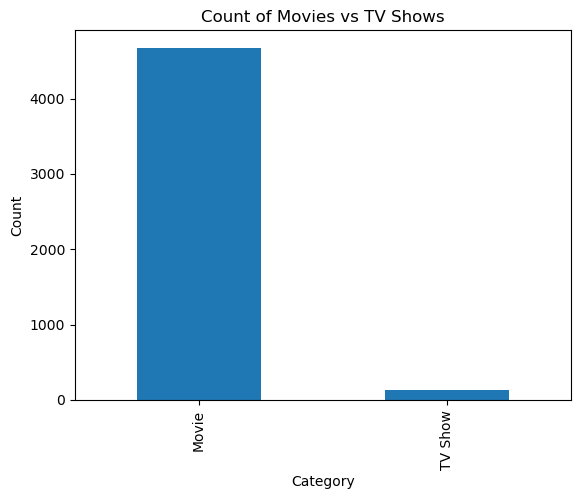

In [19]:
category_counts = clean_df["Category"].value_counts()
print(category_counts)

category_counts.plot(kind="bar")
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Task 1: Find the Show Id and Director for 'House of Cards'

In [21]:
clean_df.loc[clean_df["Title"] == "House of Cards", ["Show_Id", "Director"]]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


## Task 2: Find the year with the highest number of releases and visualize using a bar graph
In this task, we extract the release year from the Release_Date column and determine which year has the highest number of Movies and TV Shows released on Netflix.

In [22]:
# Extract year from Release_Date
clean_df["Release_Date"] = pd.to_datetime(clean_df["Release_Date"], errors="coerce")
clean_df["Year"] = clean_df["Release_Date"].dt.year

C:\Users\HP\AppData\Local\Temp\ipykernel_27688\3884020681.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_df["Release_Date"] = pd.to_datetime(clean_df["Release_Date"], errors="coerce")


In [23]:
year_counts = clean_df["Year"].value_counts().sort_index()
print(year_counts)

Year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      50
2016     207
2017     752
2018    1115
2019    1337
2020    1229
2021      78
Name: count, dtype: int64


In [24]:
max_year = year_counts.idxmax()
max_value = year_counts.max()

print("Year with highest releases:", max_year)
print("Number of releases:", max_value)

Year with highest releases: 2019
Number of releases: 1337


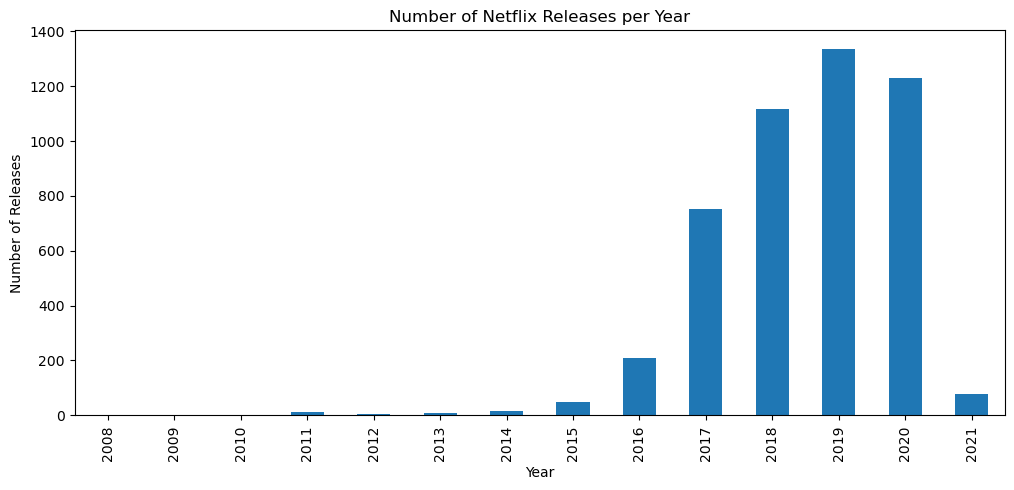

In [25]:
import matplotlib.pyplot as plt

year_counts.plot(kind="bar", figsize=(12,5))
plt.title("Number of Netflix Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()

## Task 3: Count the number of Movies and TV Shows and visualize using a bar graph
In this task, we count how many Movies and TV Shows are present in the dataset and visualize the result using a bar chart.

In [26]:
category_counts = clean_df["Category"].value_counts()
print(category_counts)

Category
Movie      4673
TV Show     136
Name: count, dtype: int64


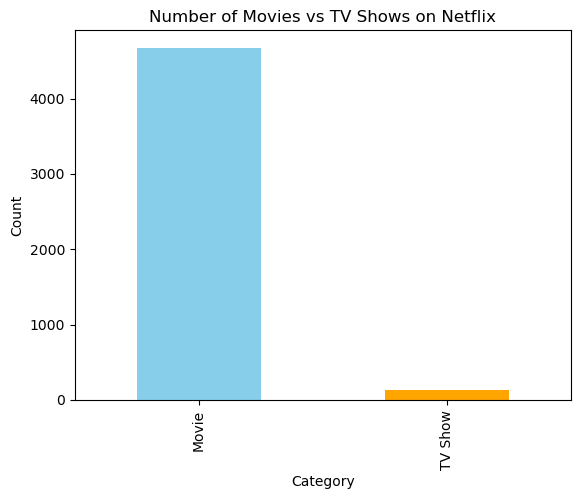

In [27]:
category_counts.plot(kind="bar", color=["skyblue", "orange"])
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Task 4: Show all Movies that were released in the year 2000
In this task, we filter the dataset to display all Movies that were released in the year 2000.

In [30]:
clean_df["Release_Date"] = pd.to_datetime(clean_df["Release_Date"], errors="coerce")
clean_df["Year"] = clean_df["Release_Date"].dt.year

In [31]:
movies_2000 = clean_df[
    (clean_df["Category"] == "Movie") &
    (clean_df["Year"] == 2000)
]

movies_2000

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year


## Task 5: Show only the titles of all TV Shows that were released in India
In this task, we filter the dataset to display only the titles of TV Shows released in India.

In [32]:
india_tv_shows = clean_df[
    (clean_df["Category"] == "TV Show") &
    (clean_df["Country"].str.contains("India", na=False))
]

india_tv_shows["Title"]

132                                 7 (Seven)
2406                                    GHOUL
3119             Jamtara - Sabka Number Ayega
4724                          Paava Kadhaigal
5332                             Sacred Games
6037    Th Eena Meena Deeka Chase Comedy Show
Name: Title, dtype: object

## Task 6: Find the Top 10 Directors with the highest number of Movies and TV Shows
In this task, we identify the top 10 directors who have contributed the highest number of Movies and TV Shows to Netflix.

In [33]:
top_directors = clean_df["Director"].value_counts().head(10)
top_directors

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: count, dtype: int64

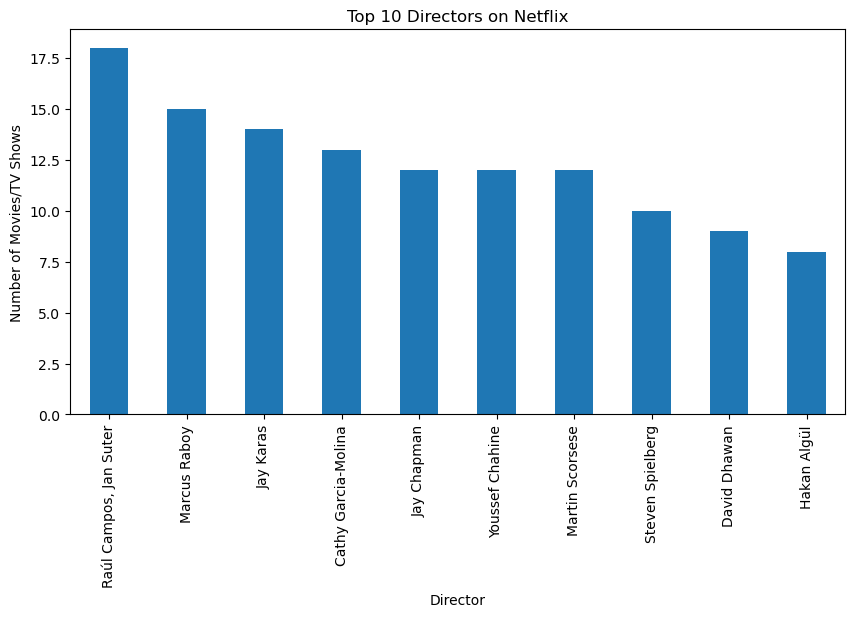

In [34]:
top_directors.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Movies/TV Shows")
plt.show()

## Task 7: Show all records where Category is 'Movie' and Type is 'Comedies' OR Country is 'United Kingdom'
In this task, we apply multiple filtering conditions using logical operators to retrieve the required records.

In [35]:
task7_result = clean_df[
    ((clean_df["Category"] == "Movie") & (clean_df["Type"].str.contains("Comedies", na=False))) |
    (clean_df["Country"].str.contains("United Kingdom", na=False))
]

task7_result

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2019-06-01,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ...",2019
37,s38,Movie,#Selfie 69,Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,2019-06-01,TV-MA,119 min,"Comedies, Dramas, International Movies","After a painful breakup, a trio of party-lovin...",2019
...,...,...,...,...,...,...,...,...,...,...,...,...
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2019-12-15,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019
7774,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,2017-07-01,TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the...",2017
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


In [36]:
task7_result[["Title", "Category", "Type", "Country"]]

,Title,Category,Type,Country
18,15-Aug,Movie,"Comedies, Dramas, Independent Movies",India
33,#realityhigh,Movie,Comedies,United States
34,#Roxy,Movie,"Comedies, Romantic Movies",Canada
36,#Selfie,Movie,"Comedies, Dramas, International Movies",Romania
37,#Selfie 69,Movie,"Comedies, Dramas, International Movies",Romania
...,...,...,...,...
7771,Zindagi Na Milegi Dobara,Movie,"Comedies, Dramas, International Movies",India
7774,Zipi & Zape y la Isla del Capitan,Movie,"Children & Family Movies, Comedies",Spain
7780,Zombieland,Movie,"Comedies, Horror Movies",United States
7783,Zoom,Movie,"Children & Family Movies, Comedies",United States


## Task 8: Find how many Movies or TV Shows feature Tom Cruise in the cast
In this task, we search the Cast column to identify how many records include Tom Cruise as part of the cast.

In [37]:
tom_cruise_df = clean_df[clean_df["Cast"].str.contains("Tom Cruise", na=False)]
tom_cruise_df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019


In [38]:
len(tom_cruise_df)

2

## Task 9: Identify all the different Ratings defined by Netflix
In this task, we extract all unique rating categories available in the dataset to understand the classification of Netflix content.

In [39]:
clean_df["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [40]:
clean_df["Rating"].nunique()

14

In [42]:
tv14_canada_movies[["Title", "Country", "Rating"]]

,Title,Country,Rating
34,#Roxy,Canada,TV-14
608,At First Light,Canada,TV-14
614,ATM,"United States, Canada",TV-14
1506,Counterfeiting in Suburbia,Canada,TV-14
2229,For the Love of Spock,"Canada, United States",TV-14
2834,House of Z,"United States, Canada",TV-14
2902,I Am the Pretty Thing That Lives in the House,"Canada, United States",TV-14
3713,Long Time Running,Canada,TV-14
3956,"Martin Matte: La vie, la mort...eh la la..!",Canada,TV-14
5004,Punjab 1984,"Canada, India",TV-14


## Task 10: Determine the maximum duration of a Movie or TV Show on Netflix

In [45]:
# Extract numeric part from Duration
clean_df["Duration_Num"] = clean_df["Duration"].str.extract(r"(\d+)").astype(float)

# Find maximum duration record
clean_df.loc[clean_df["Duration_Num"].idxmax(), ["Title", "Duration", "Category"]]

Title       The School of Mischief
Duration                   253 min
Category                     Movie
Name: 6852, dtype: object

## Task 11: Identify the country with the highest number of TV Shows

In [46]:
clean_df[clean_df["Category"] == "TV Show"]["Country"].value_counts().head(1)

Country
United States    27
Name: count, dtype: int64

## Task 12: Sort the dataset by Year and display the result

In [48]:
clean_df.sort_values(by="Year", ascending=False).head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Duration_Num
1002,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",2021-01-01,PG-13,94 min,"Action & Adventure, Comedies",A jewel thief returns to his hiding place afte...,2021,94.0
4882,s4882,Movie,Playing for Keeps,Gabriele Muccino,"Gerard Butler, Jessica Biel, Catherine Zeta-Jo...",United States,2021-01-03,PG-13,106 min,"Comedies, Romantic Movies, Sports Movies","A washed-up, former soccer star attempts to re...",2021,106.0
692,s693,Movie,Bad Grandpa .5,Jeff Tremaine,"Johnny Knoxville, Jackson Nicoll, Greg Harris,...",United States,2021-01-01,TV-MA,87 min,Comedies,The geriatric antics of Irving Zisman continue...,2021,87.0
4269,s4270,Movie,Mud,Jeff Nichols,"Matthew McConaughey, Reese Witherspoon, Tye Sh...",United States,2021-01-01,PG-13,131 min,"Dramas, Independent Movies",Two Mississippi teens meet peculiar drifter Mu...,2021,131.0
5139,s5139,Movie,Redemption,Steven Knight,"Jason Statham, Agata Buzek, Vicky McClure, Ben...","United Kingdom, United States",2021-01-01,R,100 min,"Action & Adventure, Dramas, International Movies",An Afghanistan veteran haunted by his dark pas...,2021,100.0


## Task 13: Find all instances where Category is 'Movie' and Type is 'Dramas' OR Category is 'TV Show' and Type is 'Kids’ TV'

In [54]:
task13_result = clean_df[
    ((clean_df["Category"] == "Movie") & (clean_df["Type"].str.contains("Dramas", na=False))) |
    ((clean_df["Category"] == "TV Show") & (clean_df["Type"].str.contains("Kids", na=False)))
]

task13_result[["Title", "Category", "Type", "Country"]]

,Title,Category,Type,Country
1,7:19,Movie,"Dramas, International Movies",Mexico
4,21,Movie,Dramas,United States
7,187,Movie,Dramas,United States
10,1922,Movie,"Dramas, Thrillers",United States
15,1-Oct,Movie,"Dramas, International Movies, Thrillers",Nigeria
...,...,...,...,...
7776,Zodiac,Movie,"Cult Movies, Dramas, Thrillers",United States
7778,Zokkomon,Movie,"Children & Family Movies, Dramas",India
7782,Zoo,Movie,"Dramas, Independent Movies, International Movies",India
7784,Zozo,Movie,"Dramas, International Movies","Sweden, Czech Republic, United Kingdom, Denmar..."


In [ ]:
task13_result[["Title", "Category", "Type", "Country"]]

## Conclusion

Based on the analysis of the Netflix dataset, several important insights were identified.  
The dataset is highly dominated by Movies, with a total of 4673 Movies compared to only 136 TV Shows.  
This indicates that Movies form the majority of Netflix content within this dataset.

The analysis of release trends shows that the highest number of Movies and TV Shows were released in 2019 and 2020, reflecting a significant growth in Netflix content production during these years.  
Additionally, no Movies were found to be released in the year 2000 after data cleaning, suggesting limited availability of older content in the dataset.

The exploration of regional content revealed that several TV Shows were produced in India, highlighting Netflix’s global content distribution.  
Furthermore, the top contributing directors such as Raúl Campos & Jan Suter, Marcus Raboy, and Jay Karas were identified as the most frequent content creators on Netflix.

The dataset also contains a wide range of content ratings, with categories such as TV-MA, R, PG-13, and TV-14 being commonly used.  
The longest duration content identified was a Movie titled "The School of Mischief" with a duration of 253 minutes.

In terms of geographical contribution, the United States was found to be the country with the highest number of TV Shows in the dataset.  
Overall, this project demonstrated how data cleaning, filtering, grouping, and visualization techniques can be applied using Python and pandas to extract meaningful insights from a real-world dataset.